### Introduction

In today’s digital era, millions are expressing themselves on Twitter, sharing a wide range of emotions from joy to sorrow, and anger. Sentiment analysis dives into this vast pool of textual data to discern underlying emotions, opinions, and attitudes, reflecting how humans process thoughts. It categorizes sentiments into basic dichotomies like positive versus negative, offering invaluable insights for industries eager to gauge public sentiment on their products and services. Such analysis is pivotal for measuring customer satisfaction and driving enhancements in service offerings. Twitter, a leading microblogging platform since 2006, stands out with its rapid user base expansion, currently boasting about 200 million users. It offers a unique glimpse into public sentiment through tweets, concise messages limited to 140 characters. Leveraging Natural Language Processing (NLP) techniques, such as tokenization and stop word removal, sentiment analysis on Twitter data can reveal trending emotions and opinions on a wide array of topics.

### Project Objective
The goal is to develop a sentiment analyzer capable of discerning the sentiment (positive, negative) of Twitter tweets. This involves employing a neural network framework using TensorFlow to navigate the complexities of text sentiment analysis effectively.

### Evaluation Metrics
To assess the performance of our model post-training, we will employ several evaluation metrics:

Accuracy: Measures the proportion of correctly predicted sentiments out of all predictions.
Confusion Matrix: Provides a visual representation of the model's performance, highlighting true positives, true negatives, false positives, and false negatives.
ROC Curve: Illustrates the model's diagnostic ability by plotting the true positive rate against the false positive rate at various threshold settings.

### Technical Approach
This project will utilize Python within the Jupyter Notebook environment, renowned for supporting machine learning and data science endeavors. Our methodology includes constructing a TensorFlow-based model, with the training and evaluation phases leveraging the Sentiment 140 dataset. The dataset will be split into a 70:30 ratio for training and testing purposes, respectively. Following model training, we will apply our defined evaluation metrics to gauge the trained model's performance accurately.

### Data Source
https://www.kaggle.com/kazanova/sentiment140

### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
os.getcwd()

'C:\\Users\\fa393317\\OneDrive - Ohio University'

### Loading data

In [71]:
data = pd.read_csv("/Users/fa393317/OneDrive - Ohio University/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

### EPA

In [72]:
data.head()                               #First 5 rows of data

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [73]:
data.tail()                              #Last 5 rows of data

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


### Features

In [74]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

In [75]:
print('lenght of data is', len(data))
data.shape

lenght of data is 1599999


(1599999, 6)

### Information about data

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [77]:
data.dtypes                         #Data types

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

In [78]:
np.sum(data.isnull().any(axis=1))           #Checking for null values

0

In [79]:
data=data[['text','label']]                 #Selecting the text and label columns

In [80]:
data['label'].unique()                      #Identify unique values in the label column

array([0, 4], dtype=int64)

In [81]:
data['label'][data['label']==4]=1           #Replacing label 4 with 1

In [82]:
data_pos = data[data['label'] == 1]         #Separating positive and negative tweets
data_neg = data[data['label'] == 0]

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
#data_pos

data = pd.concat([data_pos, data_neg])       #Combining positive and negative tweets
data

,text,label
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800002,Being sick can be really cheap when it hurts t...,1
800003,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
19995,One more day of holidays,0
19996,feeling so down right now .. i hate you DAMN H...,0
19997,"geez,i hv to READ the whole book of personalit...",0
19998,I threw my sign at donnie and he bent over to ...,0


In [83]:
data['text']=data['text'].str.lower()          #Making text lowercase
data['text'].head()

799999         i love @health4uandpets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @darealsunisakim thanks for the twitter add, s...
800002    being sick can be really cheap when it hurts t...
800003      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [30]:
nltk.download('stopwords')          #Downloading stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fa393317\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [84]:
stopwords_list = stopwords.words('english')

In [85]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [86]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words('english'))           
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [87]:
#Cleaning and removing punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

In [88]:
#Removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [89]:
#removing emails
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [90]:
#Removing URLs
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [91]:
#Removing numerical values from text
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

### Tokenization of text

In [92]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

### Applying stemming

In [93]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

### Applying Lemmatization

In [94]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fa393317\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

### Separating data into predictors and response

In [95]:
X=data.text
y=data.label

####
Preparing the input features for training
1. We converting the text words into arrays form.
2. Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [96]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [97]:
sequences_matrix.shape

(40000, 500)

Separating the 70% data for training data and 30% for testing data
As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.

1. 70% tweets will be used in the training
2. 30% tweets will be used to test the performance of the model.

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [99]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

### Model Compilation
1. First we are calling the model
2. We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
3. Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
4. We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [100]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

Training and validating with parameter tuning
1. We are feeding the training data and getting 10% data for validation from training data
2. We set the following parameters:
3. Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
4. Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
5. We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.

In [101]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
315/315 [==============================] - 139s 437ms/step - loss: 0.6129 - accuracy: 0.6537 - val_loss: 0.5327 - val_accuracy: 0.7400
Epoch 2/6
315/315 [==============================] - 136s 433ms/step - loss: 0.5136 - accuracy: 0.7490 - val_loss: 0.5195 - val_accuracy: 0.7500
Epoch 3/6
315/315 [==============================] - 136s 433ms/step - loss: 0.4996 - accuracy: 0.7610 - val_loss: 0.5169 - val_accuracy: 0.7425
Epoch 4/6
315/315 [==============================] - 137s 434ms/step - loss: 0.4911 - accuracy: 0.7646 - val_loss: 0.5180 - val_accuracy: 0.7436
Epoch 5/6
315/315 [==============================] - 136s 433ms/step - loss: 0.4776 - accuracy: 0.7727 - val_loss: 0.5292 - val_accuracy: 0.7321
Epoch 6/6
315/315 [==============================] - 137s 435ms/step - loss: 0.4646 - accuracy: 0.7791 - val_loss: 0.5317 - val_accuracy: 0.7411
Training finished !!


Testing the Trained model on test data
1. Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [102]:
accr1 = model.evaluate(X_test,Y_test)

375/375 [==============================] - 21s 55ms/step - loss: 0.5250 - accuracy: 0.7452


Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
1. As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [103]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 21s 54ms/step


Confusion matrix



confusion matrix


[[4376 1633]
 [1425 4566]]




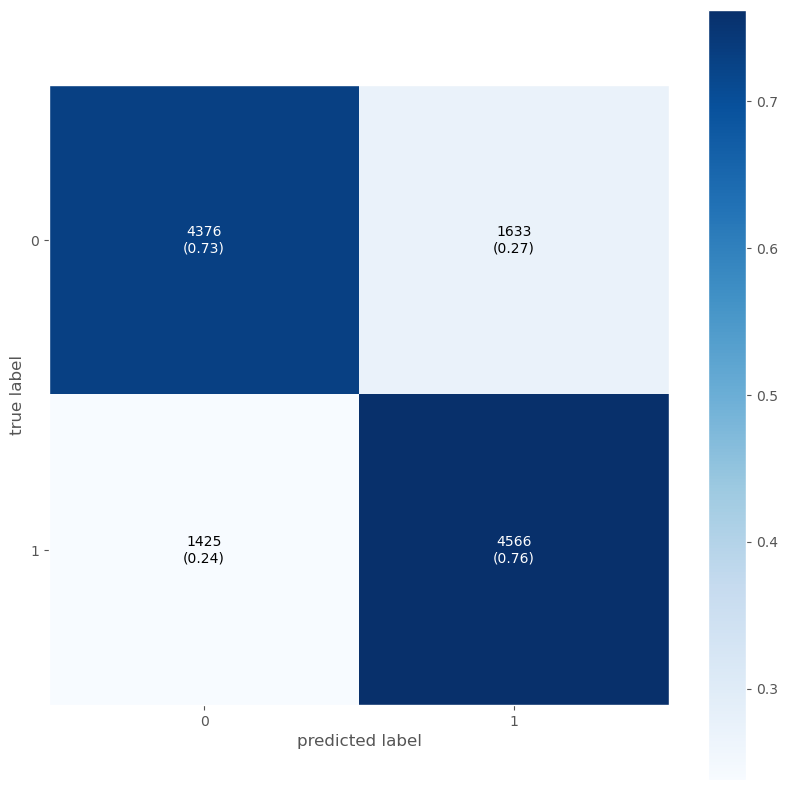

In [104]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### ROC CURVE
1. ROC curve show the performance of the model as well.
2. We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
3. ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

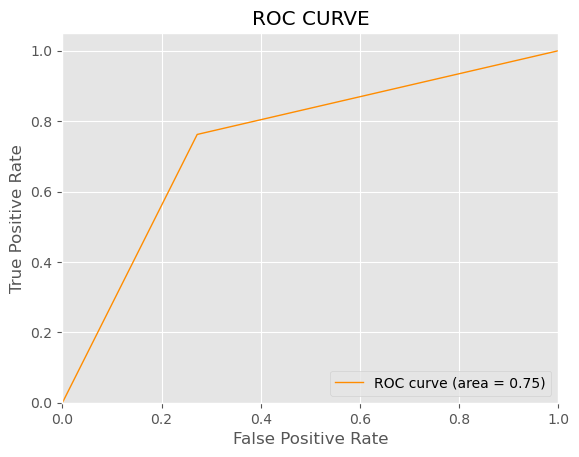

In [105]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()